In [1]:
# Import packages required for matrix and graphic representations

import pandas as pd

# Data Visualisation
import seaborn as sns
%matplotlib inline

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
#warnings.filterwarnings('once')
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import pandas as pd
from IPython.display import Markdown, display
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn import metrics

In [2]:
data = pd.read_csv('CSV_DEF_CLASIF.csv')
data.head()

,created_at,aid,extension,format,duration,FILE_STORED,FACIAL_ANALYSED,VOICE_ANALYSED,VOICE_TRANSCRIBED,BIOMETRICS_EXTRACTED,...,language,surprised_voice,no_speech_prob,entropy,tense_past,tense_present,tense_future,sentiment_polarity,sentiment_subjectivity,variable
0,1744824974,63612104-cc5c-4d54-b136-1f5880dece96,.mp4,video,NaN,True,True,False,True,False,...,en,NaN,0.006900,4.4125,0.3158,0.6842,0.0000,0.0932,0.5386,TDAH
1,1744825004,1afe2c00-8488-40f2-b3e1-5bd90fd57ad8,.mp4,video,213.0,True,True,True,True,True,...,en,0.043251,0.372388,4.3565,0.0769,0.9231,0.0000,0.2364,0.5069,TDAH
2,1744825017,6c987224-499c-469a-b908-dffef38c48b4,.mp4,video,115.0,True,True,True,True,True,...,es,0.190980,0.086458,4.1783,0.0000,1.0000,0.0000,0.3056,0.5162,Autismo
3,1744825025,e34d8573-7371-486a-900c-32a6ee78fabe,.mp4,video,202.0,True,True,True,True,True,...,es,0.006369,0.102629,4.2469,0.0833,0.7500,0.1667,0.2268,0.5349,Autismo
4,1744825037,5b442dc9-a39a-47e2-ba05-b0fe880ee44b,.mp4,video,135.0,True,True,True,True,True,...,es,0.047226,0.055492,4.2440,0.0833,0.9167,0.0000,0.2170,0.5825,Autismo


In [3]:
# Copia del dataframe original
df = data.copy()

# Columnas a eliminar (sin eliminar 'language')
cols_to_drop = [
    'created_at', 'aid', 'extension', 'format', 'duration',
    'FILE_STORED', 'FACIAL_ANALYSED', 'VOICE_ANALYSED', 'VOICE_TRANSCRIBED',
    'BIOMETRICS_EXTRACTED', 'SPEECH_ANALYSED', 'PERSONALITY_ANALYSED',
    'FACES_EXTRACTED', 'id'
]

# Eliminar columnas
df.drop(columns=cols_to_drop, inplace=True)

# Comprobación
print(f"Número de columnas tras la limpieza: {df.shape[1]}")
df.head()

Número de columnas tras la limpieza: 68


,angry_facial,disgust_facial,fear_facial,happy_facial,sad_facial,surprise_facial,neutral_facial,most_frequent_dominant_emotion,dominant_emotion_counts_surprise,average_face_confidence,...,language,surprised_voice,no_speech_prob,entropy,tense_past,tense_present,tense_future,sentiment_polarity,sentiment_subjectivity,variable
0,0.2098,0.0008,0.4117,0.1561,0.2053,0.0063,0.0099,sad,NaN,0.9500,...,en,NaN,0.006900,4.4125,0.3158,0.6842,0.0000,0.0932,0.5386,TDAH
1,0.0271,0.0000,0.1126,0.0005,0.6216,0.0001,0.2381,sad,NaN,0.9200,...,en,0.043251,0.372388,4.3565,0.0769,0.9231,0.0000,0.2364,0.5069,TDAH
2,0.1140,0.0000,0.1678,0.0062,0.4205,0.0020,0.2895,sad,NaN,0.9833,...,es,0.190980,0.086458,4.1783,0.0000,1.0000,0.0000,0.3056,0.5162,Autismo
3,0.0931,0.0771,0.1322,0.0408,0.3593,0.0007,0.2969,sad,NaN,0.9500,...,es,0.006369,0.102629,4.2469,0.0833,0.7500,0.1667,0.2268,0.5349,Autismo
4,0.0315,0.0001,0.0204,0.4411,0.2166,0.0009,0.2895,neutral,NaN,0.9167,...,es,0.047226,0.055492,4.2440,0.0833,0.9167,0.0000,0.2170,0.5825,Autismo


In [4]:
# Eliminar filas con clase 'Dispraxia'
df = df[df['variable'] != 'Dispraxia'].copy()

# Comprobación
print("Distribución de clases tras eliminar Dispraxia:")
print(df['variable'].value_counts())

Distribución de clases tras eliminar Dispraxia:
variable
Autismo     2093
Control     2033
TDAH        2030
Dislexia    2026
Name: count, dtype: int64


In [5]:
# Ver número de valores nulos por columna (ordenado)
df.isnull().sum().sort_values(ascending=False).head(20)

dominant_emotion_counts_surprise    7184
neutral_facial                       988
disgust_facial                       988
average_face_confidence              988
most_frequent_dominant_emotion       988
angry_facial                         988
surprise_facial                      988
sad_facial                           988
happy_facial                         988
fear_facial                          988
voice_kurtosis                       351
voice_median                         351
voice_mode                           351
voice_Q25                            351
voice_Q75                            351
voice_IQR                            351
voice_skewness                       351
voice_Q75_note                       351
voice_mean_note                      351
voice_median_note                    351
dtype: int64

In [6]:
print ("Tamaño del dataset:", df.shape)

Tamaño del dataset: (8182, 68)


In [7]:
# Eliminar columna con demasiados nulos
df.drop(columns=['dominant_emotion_counts_surprise'], inplace=True)

In [8]:
columnas_con_nulos = df.columns[df.isnull().any()].tolist()

# 3. Rellenar según el tipo de dato
for col in columnas_con_nulos:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])
        print(f"ℹ️ Columna categórica '{col}' rellenada con su moda")

# 4. Comprobar que ya no quedan nulos
total_nulos = df.isnull().sum().sum()
print(f"\n✅ Nulos restantes tras limpieza: {total_nulos}")

ℹ️ Columna categórica 'most_frequent_dominant_emotion' rellenada con su moda
ℹ️ Columna categórica 'voice_mean_note' rellenada con su moda
ℹ️ Columna categórica 'voice_median_note' rellenada con su moda
ℹ️ Columna categórica 'voice_mode_note' rellenada con su moda
ℹ️ Columna categórica 'voice_Q25_note' rellenada con su moda
ℹ️ Columna categórica 'voice_Q75_note' rellenada con su moda
ℹ️ Columna categórica 'language' rellenada con su moda

✅ Nulos restantes tras limpieza: 0


In [9]:
print ("Tamaño del dataset después (para comprobar que no se eliminan filas):", df.shape)

Tamaño del dataset después (para comprobar que no se eliminan filas): (8182, 67)


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# 1. Separar X e y
X = df.drop(columns=['variable'])  # variable objetivo
y = df['variable']

# 2. Identificar columnas categóricas para codificar
columnas_categoricas = X.select_dtypes(include=['object', 'category']).columns.tolist()
print("Columnas categóricas a codificar:", columnas_categoricas)

# 3. Aplicar OneHotEncoding
X = pd.get_dummies(X, columns=columnas_categoricas, drop_first=True)

# 4. Dividir en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Comprobación final
print("Tamaño X_train:", X_train.shape)
print("Tamaño X_test:", X_test.shape)
print("Distribución de clases en y_train:\n", y_train.value_counts())

Columnas categóricas a codificar: ['most_frequent_dominant_emotion', 'voice_mean_note', 'voice_median_note', 'voice_mode_note', 'voice_Q25_note', 'voice_Q75_note', 'language']
Tamaño X_train: (6545, 179)
Tamaño X_test: (1637, 179)
Distribución de clases en y_train:
 variable
Autismo     1674
Control     1626
TDAH        1624
Dislexia    1621
Name: count, dtype: int64


=== Clasification Report ===
              precision    recall  f1-score   support

     Autismo       0.90      0.77      0.83       419
     Control       0.85      0.89      0.87       407
    Dislexia       0.89      0.92      0.90       405
        TDAH       0.84      0.91      0.87       406

    accuracy                           0.87      1637
   macro avg       0.87      0.87      0.87      1637
weighted avg       0.87      0.87      0.87      1637



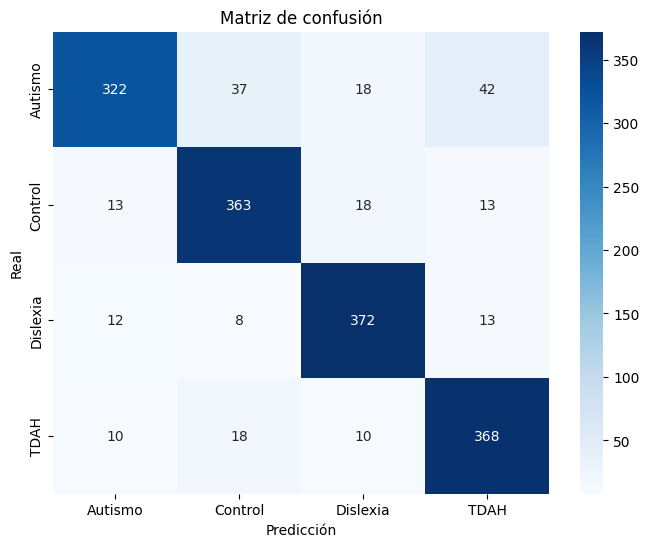

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Entrenar modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predecir sobre test
y_pred = rf.predict(X_test)

# Métricas
print("=== Clasification Report ===")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title("Matriz de confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

__________________________________

## VER IMPORTANCIA DE LAS VARIABLES

In [12]:
# Extraer importancias de las características
importancias = rf.feature_importances_

# Asociarlas a los nombres de las columnas
importancia_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importancias
}).sort_values(by='importance', ascending=False)

# Mostrar las 15 más importantes
importancia_df.head(15)

,feature,importance
10,agreeableness,0.030579
53,entropy,0.023936
44,sad_voice,0.020778
52,no_speech_prob,0.020714
11,conscientiousness,0.020494
9,neuroticism,0.020454
41,voice_rmse,0.020103
8,extraversion,0.019729
30,depression_medium,0.019664
49,angry_voice,0.019321


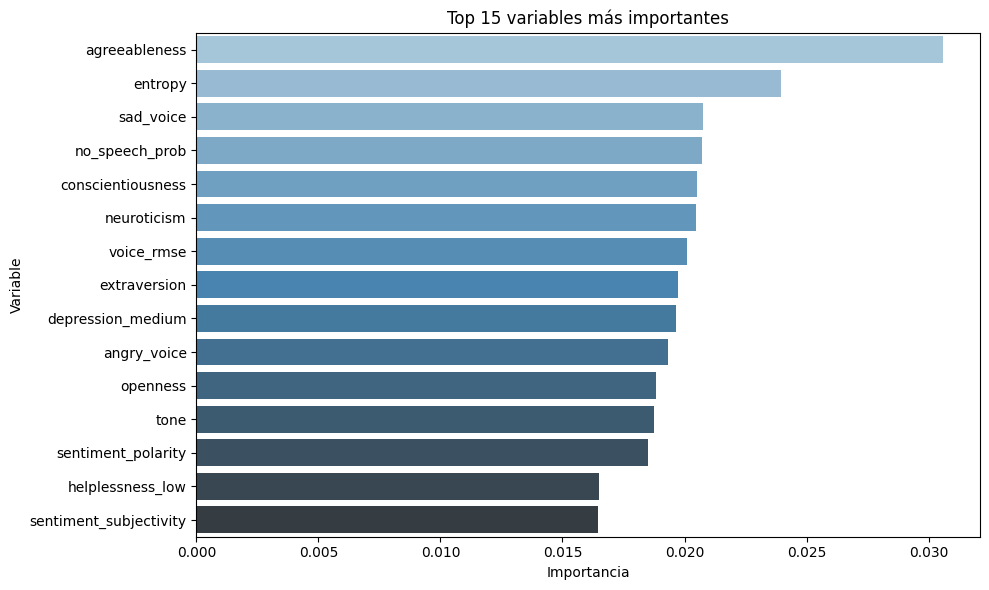

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=importancia_df.head(15), x='importance', y='feature', palette='Blues_d')
plt.title('Top 15 variables más importantes')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

----

### GridSearchCV

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Mejores parámetros encontrados:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
=== Classification Report ===
              precision    recall  f1-score   support

     Autismo       0.90      0.76      0.83       419
     Control       0.86      0.88      0.87       407
    Dislexia       0.90      0.92      0.91       405
        TDAH       0.82      0.91      0.86       406

    accuracy                           0.87      1637
   macro avg       0.87      0.87      0.87      1637
weighted avg       0.87      0.87      0.87      1637



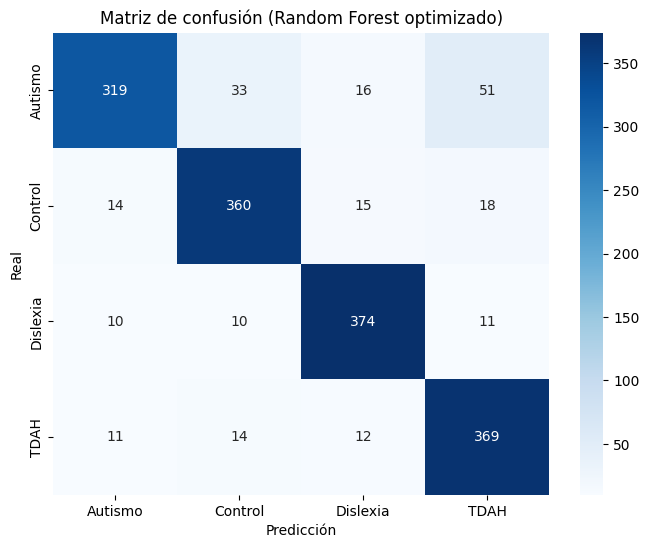

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definimos una cuadrícula de hiperparámetros para explorar
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Creamos el modelo base
rf = RandomForestClassifier(random_state=42)

# Configuramos la búsqueda con validación cruzada
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',  # También puedes usar 'f1_macro' o 'f1_weighted'
    n_jobs=-1,
    verbose=1
)

# Ejecutamos la búsqueda sobre los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mostramos los mejores parámetros encontrados
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

# Evaluamos el mejor modelo
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Reporte de clasificación
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=best_rf.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=best_rf.classes_, yticklabels=best_rf.classes_)
plt.title("Matriz de confusión (Random Forest optimizado)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()